## Library import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#!pip install tensorflow

## Data import

In [3]:
data = pd.read_csv('./data/Telco_customer_churn.csv')
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score.1,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Yes,0.0,0,20.94,129.09,1,Churned,86,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,0.0,0,18.24,169.89,2,Churned,67,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,97.20,917.70,3,Churned,86,Other


## Understanding the dataset + Feature engineering

In [4]:
data.dtypes

customerID                            object
gender                                object
SeniorCitizen                          int64
Partner                               object
Dependents                            object
tenure                                 int64
PhoneService                          object
MultipleLines                         object
InternetService                       object
OnlineSecurity                        object
OnlineBackup                          object
DeviceProtection                      object
TechSupport                           object
StreamingTV                           object
StreamingMovies                       object
Contract                              object
PaperlessBilling                      object
PaymentMethod                         object
MonthlyCharges                       float64
TotalCharges                          object
Churn                                 object
churn_rate                             int64
Churn Scor

In [5]:
data.isna().sum(axis = 0)

customerID                              0
gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
MultipleLines                           0
InternetService                         0
OnlineSecurity                          0
OnlineBackup                            0
DeviceProtection                        0
TechSupport                             0
StreamingTV                             0
StreamingMovies                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
churn_rate                              0
Churn Score                             0
CLTV                              

Churn Reason과 Offer에만 null값이 있다.Churn Reason 데이터에서는 고객이 이탈하지 않았기 때문에 null값이 있는 것이다.

In [6]:
data.drop(['customerID', 'churn_rate', 'Churn', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'], axis = 1, inplace = True)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score.1,Churn Category
0,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Yes,0.0,0,20.94,129.09,1,Churned,86,Competitor
1,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Yes,0.0,0,18.24,169.89,2,Churned,67,Other
2,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,0.0,0,97.20,917.70,3,Churned,86,Other


관련 없는 변수는 drop 한다.

In [7]:
data['Count'].unique()

array([1], dtype=int64)

'Count' 변수는 1만 가지고 있다. 이것도 drop한다.

In [8]:
data.drop('Count', axis = 1, inplace = True)

'가입'고객의 행동은 아직 결정되지 않았기 때문에 생략한다.

In [9]:
data = data[data['Customer Status'] != 'Joined']

Yes/No 를 0/1로 변경

In [10]:
boolean_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                   'StreamingTV', 'StreamingMovies', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Streaming Music',
                   'Under 30', 'Married', 'Referred a Friend', 'Unlimited Data', 'Premium Tech Support']
for feat in boolean_features:
    data[feat] = data[feat].map({'Yes' : 1, 'No' : 0, 'No phone service' : 0, 'No internet service' : 0})
data['Customer Status'] = data['Customer Status'].map({'Stayed':0, 'Churned':1})

In [11]:
data.isna().sum(axis = 0)

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
MultipleLines                           0
InternetService                         0
OnlineSecurity                          0
OnlineBackup                            0
DeviceProtection                        0
TechSupport                             0
StreamingTV                             0
StreamingMovies                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
Churn Score                             0
CLTV                                    0
Churn Reason                         4720
Age                                     0
Under 30                          

In [12]:
data.dtypes

gender                                object
SeniorCitizen                          int64
Partner                                int64
Dependents                             int64
tenure                                 int64
PhoneService                           int64
MultipleLines                          int64
InternetService                       object
OnlineSecurity                         int64
OnlineBackup                           int64
DeviceProtection                       int64
TechSupport                            int64
StreamingTV                            int64
StreamingMovies                        int64
Contract                              object
PaperlessBilling                       int64
PaymentMethod                         object
MonthlyCharges                       float64
TotalCharges                          object
Churn Score                            int64
CLTV                                   int64
Churn Reason                          object
Age       

'Under 30', 'SeniorCitizen' 변수가 있기 때문에 'Age'는 없애도 된다.

In [13]:
data.drop('Age', axis = 1, inplace = True)

'Number of Referrals' 변수가 있기 때문에 'Referred a Friend'는 없애도 된다.

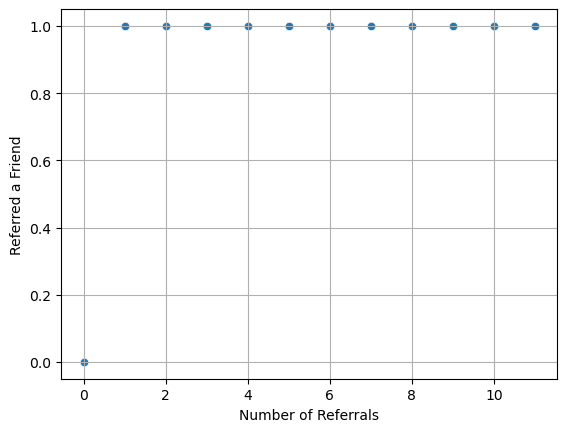

In [14]:
sns.scatterplot(x = data["Number of Referrals"], y = data["Referred a Friend"])

plt.grid(True) # x, y 축에 대해 그리드 표시

plt.show()

가능한 이탈 이유 모두 확인

In [15]:
data['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

'Deceased'와 'Moved'는 외부적인 요인이므로 이번 분석에는 포함하지 않는다.

In [16]:
data = data[~data['Churn Reason'].isin(['Deceased', 'Moved'])]
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score.1,Churn Category
0,Male,0,0,0,2,1,0,DSL,1,1,...,0,1,0.0,0,20.94,129.09,1,1,86,Competitor
4,Male,0,0,0,49,1,1,Fiber optic,0,1,...,0,1,0.0,0,2172.17,7208.47,1,1,89,Competitor
5,Female,0,1,1,10,1,0,DSL,0,0,...,1,1,0.0,0,94.10,622.45,1,1,78,Competitor


이탈 이유를 더 넓은 범주로 그룹화한다.

In [17]:
data['Churn Category'].value_counts()

Churn Category
0                  4720
Competitor          834
Attitude            314
Dissatisfaction     303
Price               211
Other               148
Name: count, dtype: int64

In [18]:
pd.crosstab(data['Churn Reason'], data['Churn Category'])

Churn Category,Attitude,Competitor,Dissatisfaction,Other,Price
Churn Reason,,,,,
Attitude of service provider,91,40,0,1,3
Attitude of support person,138,50,0,1,3
Competitor had better devices,0,126,0,0,4
Competitor made better offer,0,136,0,4,0
Competitor offered higher download speeds,28,158,0,2,1
Competitor offered more data,9,152,0,1,0
Don't know,0,15,0,133,6
Extra data charges,0,16,0,1,40
Lack of affordable download/upload speed,5,8,0,0,31


데이터 불균형이 확인된다. 보다시피 'Joined', 'Stayed', 'Churned' 고객이 있다.

In [19]:
data['Customer Status'].value_counts()

Customer Status
0    4720
1    1810
Name: count, dtype: int64

In [20]:
data = data[data['Customer Status'] != 'Joined']
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score.1,Churn Category
0,Male,0,0,0,2,1,0,DSL,1,1,...,0,1,0.0,0,20.94,129.09,1,1,86,Competitor
4,Male,0,0,0,49,1,1,Fiber optic,0,1,...,0,1,0.0,0,2172.17,7208.47,1,1,89,Competitor
5,Female,0,1,1,10,1,0,DSL,0,0,...,1,1,0.0,0,94.10,622.45,1,1,78,Competitor


Gender은 이탈율에 영향을 주지 않는 것 처럼 보인다.

In [21]:
pd.crosstab(data['Customer Status'], data['gender'])

gender,Female,Male
Customer Status,,
0,2338,2382
1,910,900


In [22]:
pd.crosstab(data['Contract'], data['Customer Status'])

Customer Status,0,1
Contract,,
Month-to-month,1790,1606
One year,1289,156
Two year,1641,48


단기 계약이 더 인기 있고 단기 계약을 통해 고객들이 더 많이 이탈하는 것으로 보인다.

고객이 회사와 더 많은 시간을 보낼수록 장기적으로 계약을 선택한다.

<Axes: xlabel='Contract', ylabel='tenure'>

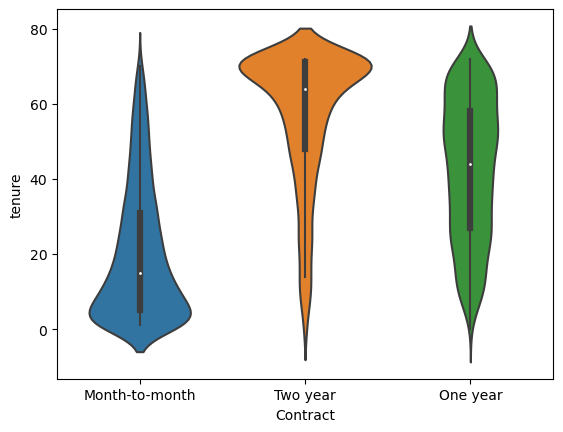

In [23]:
sns.violinplot(x = data['Contract'], y = data['tenure'])

<Axes: xlabel='Customer Status', ylabel='tenure'>

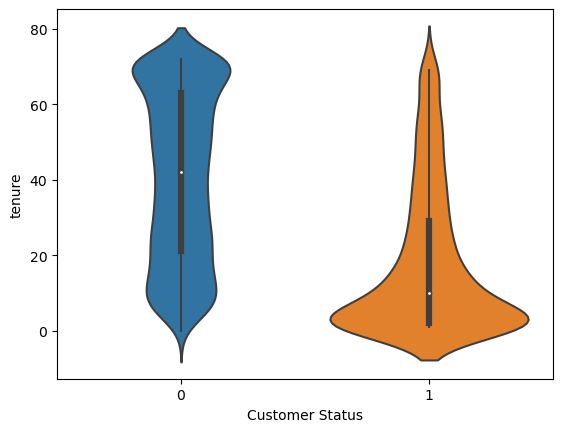

In [24]:
sns.violinplot(x = data['Customer Status'], y = data['tenure'])

종이없는 청구서를 받는 고객이 더 많이 이탈하는 것 같다.

In [25]:
pd.crosstab(data['PaperlessBilling'], data['Customer Status'])

Customer Status,0,1
PaperlessBilling,,
0,2146,448
1,2574,1362


'Total Long Distance Charges' = 'tenure' * 'Avg Monthly Long Distance Charges' 일 것이다.

C:\Users\LG\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Long Distance Charges', ylabel='Count'>

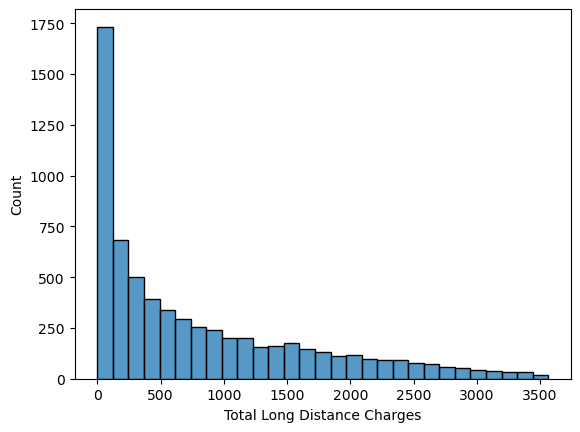

In [26]:
sns.histplot(data['Total Long Distance Charges'])

C:\Users\LG\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Avg Monthly Long Distance Charges', ylabel='Count'>

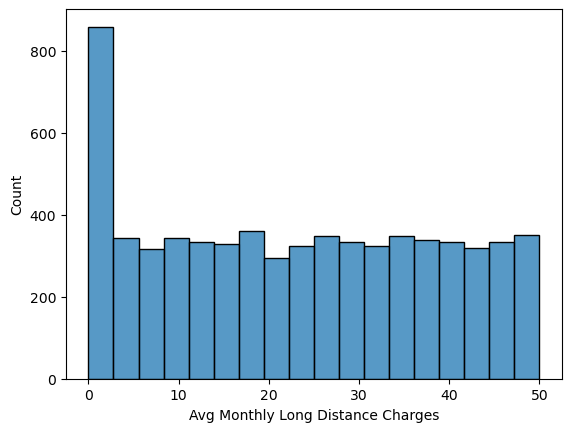

In [27]:
sns.histplot(data['Avg Monthly Long Distance Charges'])

In [28]:
((data['Avg Monthly Long Distance Charges'] * data['tenure'] - data['Total Long Distance Charges']).abs() < 1e-7).value_counts()

True     6521
False       9
Name: count, dtype: int64

1. data['Avg Monthly Long Distance Charges'] * data['tenure']
- 사용자가 tenure 기간 동안 매월 지불한 평균 장거리 전화 요금의 총합을 나타낸다.
2. - data['Total Long Distance Charges']
- 두 값 간의 차이를 나타낸다.
3. .abs()
- 차이의 절대값을 계산한다. 절대값을 취하는 이유는 음수나 양수 차이에 상관없이 그 차이를 비교할 수 있도록 하기 위함이다.
4. < 1e-7
- 절대값이 1e-7(즉, 0.0000001)보다 작은지 비교한다. 이 조건은 두 값이 매우 가까운지(거의 같다고 볼 수 있는지) 확인하는 역할을 한다.
5. .value_counts()
- 위 조건의 결과가 True 인지 False 인지 세어 각각의 개수를 반환한다.
- True는 두 값이 거의 같은 경우의 개수를 나타내고, False는 그렇지 않은 경우의 개수를 나타낸다.

In [29]:
data.drop('Total Long Distance Charges', axis = 1, inplace = True)

"Total Long Distance Charges" 변수를 삭제하는 이유는, 해당 변수가 다른 변수들로부터 계산될 수 있기 때문입니다. 구체적으로, "Total Long Distance Charges"는 보통 Avg Monthly Long Distance Charges와 tenure를 곱해서 얻을 수 있습니다. 따라서 이 변수가 데이터에 포함되어 있으면 중복 정보를 제공하게 됩니다.

1. 중복성 제거: "Total Long Distance Charges"는 이미 다른 변수 (Avg Monthly Long Distance Charges와 tenure)로 설명할 수 있는 정보입니다. 데이터에서 중복 변수를 제거하면 모델 학습이 더 효율적이고 간결해질 수 있습니다.
2. 차원의 축소: 데이터의 차원을 줄여서 모델의 복잡성을 줄이고, 과적합(overfitting)을 방지할 수 있습니다.
3. 분석 및 해석 용이성: 불필요한 변수를 제거하면 데이터가 더 간단해지고, 분석하기 쉬워집니다.


'Total Refund' 변수에는 많은 정보가 없다.

C:\Users\LG\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Refunds', ylabel='Count'>

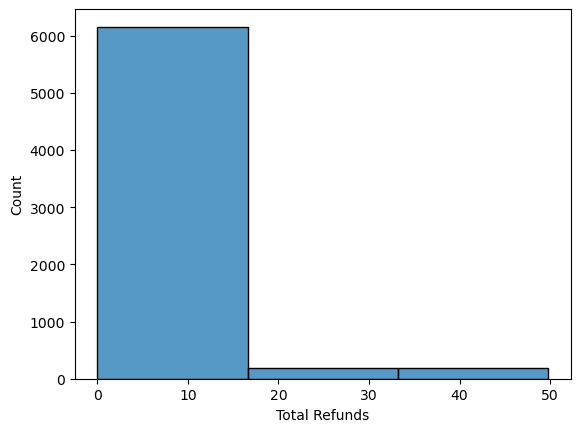

In [30]:
sns.histplot(data['Total Refunds'], bins = 3)

In [31]:
(data['Total Refunds'] > 0).value_counts()

Total Refunds
False    6010
True      520
Name: count, dtype: int64

In [32]:
data['Refunds'] = (data['Total Refunds'] > 0).astype('float')
data.drop('Total Refunds', axis = 1, inplace = True)

- 목적: "Total Refunds"를 더 간결한 이진형 변수 "Refunds"로 변환하여, 환불 여부를 나타내는 간단한 형태로 데이터에 포함시키기 위함입니다. 이는 분석 및 모델링에 유용할 수 있습니다.
- 효과: 데이터의 복잡성을 줄이고, 환불 여부를 더 직관적으로 사용할 수 있게 합니다. True/False를 1.0과 0.0으로 변환하여 수치형 변수로 만들면, 머신러닝 모델에서 더 쉽게 다룰 수 있습니다.

'Total Extra Data Charges' 변수에는 많은 정보가 없다.

C:\Users\LG\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Extra Data Charges', ylabel='Count'>

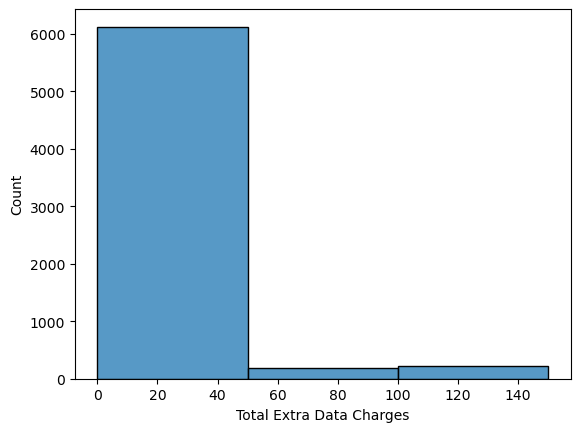

In [33]:
sns.histplot(data['Total Extra Data Charges'], bins = 3)

In [34]:
(data["Total Extra Data Charges"] > 0).value_counts()

Total Extra Data Charges
False    5852
True      678
Name: count, dtype: int64

In [35]:
data["Has Extra Data Charges"] = (data["Total Extra Data Charges"] > 0).astype("float")
data.drop("Total Extra Data Charges", axis = 1, inplace = True)

C:\Users\LG\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Revenue', ylabel='Count'>

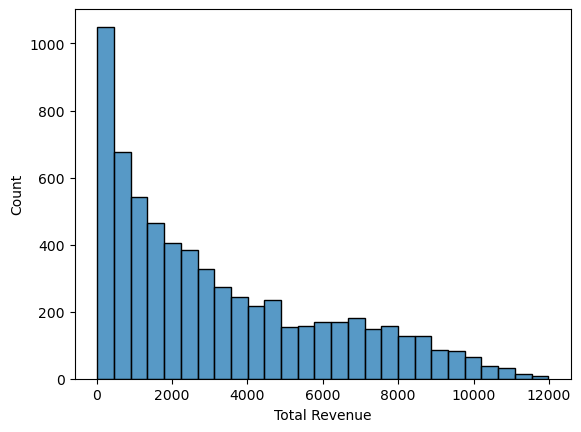

In [36]:
sns.histplot(data['Total Revenue'])

## Encoding

In [37]:
data_backup = data.copy()

In [38]:
data['Offer'] = data['Offer'].fillna('None')

In [39]:
dummies = pd.get_dummies(data[['InternetService', 'Offer', 'PaymentMethod', 'Contract']], dtype = 'uint8')

data = pd.concat([data, dummies], axis = 1)

data.drop(['InternetService', 'Offer', 'PaymentMethod', 'Contract'], axis = 1, inplace = True)

In [40]:
data['gender'] = data['gender'].map({'Male': 0, 'Female' : 1})

In [41]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn Score                                  int64
CLTV                                         int64
Churn Reason                                object
Under 30                       

## Nomalization

In [42]:
numeric_features = data.select_dtypes(include = [np.number]).columns

for feat in numeric_features:
    if feat != "Churn Category" and feat != "Churn Reason":
        data[feat] = (data[feat] - data[feat].min()) / (data[feat].max() - data[feat].min())
        data[feat] = data[feat].astype(np.float32)

In [43]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Offer_Offer C,Offer_Offer D,Offer_Offer E,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.680556,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
data.dtypes

gender                                     float32
SeniorCitizen                              float32
Partner                                    float32
Dependents                                 float32
tenure                                     float32
PhoneService                               float32
MultipleLines                              float32
OnlineSecurity                             float32
OnlineBackup                               float32
DeviceProtection                           float32
TechSupport                                float32
StreamingTV                                float32
StreamingMovies                            float32
PaperlessBilling                           float32
MonthlyCharges                             float32
TotalCharges                                object
Churn Score                                float32
CLTV                                       float32
Churn Reason                                object
Under 30                       

In [45]:
# 빈 문자열 및 공백을 NaN으로 변환
data['TotalCharges'].replace(['', ' '], np.nan, inplace=True)

# NaN 값을 처리 (예: 평균으로 대체하거나, NaN 그대로 두거나, 제거)
# 예시: NaN 값을 0으로 대체
data['TotalCharges'].fillna(0, inplace=True)

# pd.to_numeric()를 사용하여 안전하게 float로 변환 (errors='coerce'를 사용하면 변환할 수 없는 값을 NaN으로 설정)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# 마지막으로, 타입을 float32로 변경
data['TotalCharges'] = data['TotalCharges'].astype(np.float32)

C:\Users\LG\AppData\Local\Temp\ipykernel_1396\2309747390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].replace(['', ' '], np.nan, inplace=True)


In [46]:
data.dtypes

gender                                     float32
SeniorCitizen                              float32
Partner                                    float32
Dependents                                 float32
tenure                                     float32
PhoneService                               float32
MultipleLines                              float32
OnlineSecurity                             float32
OnlineBackup                               float32
DeviceProtection                           float32
TechSupport                                float32
StreamingTV                                float32
StreamingMovies                            float32
PaperlessBilling                           float32
MonthlyCharges                             float32
TotalCharges                               float32
Churn Score                                float32
CLTV                                       float32
Churn Reason                                object
Under 30                       

## Model building

### Churn prediction

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers.schedules import InverseTimeDecay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.constraints import max_norm

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

In [48]:
from keras.regularizers import l2

In [49]:
X = data.drop(['Churn Reason', 'Customer Status', 'Churn Category'],axis = 1)
y = data['Customer Status']

In [50]:
# 오류수정
from keras.callbacks import LearningRateScheduler

def inverse_time_decay(epoch):
    initial_lr = 0.1
    drop = 0.3
    epochs_drop = 20
    return initial_lr / (1 + drop * (epoch // epochs_drop))

lr_schedule = LearningRateScheduler(inverse_time_decay)

In [51]:
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01), kernel_constraint=max_norm(5.0)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01), kernel_constraint=max_norm(5.0)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01), kernel_constraint=max_norm(5.0)))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy', Recall(), Precision()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [70]:
from sklearn.utils import class_weight

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

print(class_weights)  # 클래스 가중치 확인

{0: 0.6917372881355932, 1: 1.8038674033149171}


In [74]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200,
                    batch_size=32,
                    callbacks=[EarlyStopping(monitor="val accuracy", mode='max', patience=70, restore_best_weights=True)])


Epoch 1/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7108 - loss: 11.8757 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 9.7244 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
 25/164 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7459 - loss: 9.6147 - precision: 0.0000e+00 - recall: 0.0000e+00

C:\Users\LG\anaconda3\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val accuracy` which is not available. Available metrics are: accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall
  current = self.get_monitor_value(logs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7259 - loss: 9.2114 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 7.9409 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7174 - loss: 7.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 6.7104 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7180 - loss: 6.4675 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 5.7868 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7299 - loss: 5.5849 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 5.0636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7289 - loss: 4.9065 - precision: 0.0

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7161 - loss: 0.8156 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.7897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 34/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7174 - loss: 0.7902 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.7685 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 35/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7250 - loss: 0.7634 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.7494 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 36/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7104 - loss: 0.7584 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.7321 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 37/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7234 - loss: 0.7294 - precision:

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7205 - loss: 0.5959 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5938 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 65/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7265 - loss: 0.5897 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5904 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 66/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7161 - loss: 0.5983 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 67/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7300 - loss: 0.5857 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5904 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 68/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7243 - loss: 0.5901 - precision: 

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7143 - loss: 0.5996 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.6019 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 96/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7196 - loss: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5911 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 97/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7277 - loss: 0.5878 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5904 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 98/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7259 - loss: 0.5886 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5903 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 99/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7330 - loss: 0.5833 - precision: 

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7329 - loss: 0.5819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5908 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 127/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7263 - loss: 0.5889 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5904 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 128/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7324 - loss: 0.5830 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5904 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 129/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7180 - loss: 0.5969 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7228 - val_loss: 0.5918 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 130/200
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7119 - loss: 0.6030 - precis

  2/164 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6953 - loss: 0.6157 - precision: 0.0000e+00 - recall: 0.0000e+00

In [76]:
print(classification_report(y_test, model.predict(X_test) >= 0.3))

In [54]:
print(y_train.value_counts())

Customer Status
0.0    3776
1.0    1448
Name: count, dtype: int64


In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

In [55]:
print(data.isnull().sum())

gender                                        0
SeniorCitizen                                 0
Partner                                       0
Dependents                                    0
tenure                                        0
PhoneService                                  0
MultipleLines                                 0
OnlineSecurity                                0
OnlineBackup                                  0
DeviceProtection                              0
TechSupport                                   0
StreamingTV                                   0
StreamingMovies                               0
PaperlessBilling                              0
MonthlyCharges                                0
TotalCharges                                  0
Churn Score                                   0
CLTV                                          0
Churn Reason                               4720
Under 30                                      0
Married                                 

In [56]:
print(y_train.isnull().sum())

0


In [57]:
data = data.fillna(0) # 결측값을 0으로 대체

In [59]:
print(X_train.shape, y_train.shape)
print(X_train.head())
print(y_train.head())

(5224, 48) (5224,)
      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
4115     0.0            1.0      1.0         0.0  1.000000           0.0   
1454     0.0            0.0      0.0         0.0  0.125000           0.0   
6774     0.0            0.0      0.0         0.0  0.375000           1.0   
1758     0.0            1.0      1.0         0.0  0.083333           1.0   
5056     1.0            1.0      0.0         0.0  0.194444           1.0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
4115            0.0             1.0           1.0               1.0  ...   
1454            0.0             0.0           0.0               0.0  ...   
6774            0.0             0.0           0.0               0.0  ...   
1758            0.0             0.0           0.0               1.0  ...   
5056            1.0             0.0           0.0               1.0  ...   

      Offer_Offer C  Offer_Offer D  Offer_Offer E  \
4115          

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)  # sampling_strategy 확인
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

In [66]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn Score                                0
CLTV                                       0
Under 30                                   0
Married                                    0
Referred a Friend                          0
Number of Referrals                        0
Avg Monthl

In [67]:
X_train = X_train.astype(float)
y_train = y_train.astype(int)

In [65]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [62]:
!pip install -U imbalanced-learn scikit-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------  256.0/258.3 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.0 MB 7.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/11.0 MB 6.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 6.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 6.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 7.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 7.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 7.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.0 MB 7.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.0 MB 7.4 MB/s eta 0:00:02
   ---

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.23.0 requires numpy<1.26,>=1.21.0, but you have numpy 1.26.4 which is incompatible.
sktime 0.23.0 requires pandas<2.2.0,>=1.1.0, but you have pandas 2.2.2 which is incompatible.
sktime 0.23.0 requires scikit-learn<1.4.0,>=0.24.0, but you have scikit-learn 1.5.2 which is incompatible.
